MODELI GEOMETRIJE
=========

### UVOD


## 1.EUKLIDSKA RAVNINA

Neka su $x,y \in \mathbb{R}^2,x=(x_1,x_2),y=(y_1,y_2).$<br>

1. **SKALARNI PRODUKT**   $\langle x,y\rangle =x_1y_1+x_2y_2$    
2. **NORMA**   $|| x ||=\sqrt{\langle x,x\rangle}$    
3. **METRIKA** P,Q točke   $\Rightarrow d(P,Q)=||Q-P||$    
4. **METRIČKI PROSTOR**   $(\mathbb{R}^2,d)$     $\longrightarrow$   **EUKLIDSKA RAVNINA** ($E^2$)


**DEF**: Neka je $P \in E^2$,neka je $v\in \mathbb{R}^2$  t.d $v\neq(0,0)$.
Definiramo skup $p:=${$T \in E^2 : T-P \in [v]$}. To je pravac kroz točku P smjera [v].

$T \in P \iff T-p \in [v] \iff T \in P+[v] \iff p = P+ [v]$  **LINEARNA MNOGOSTRUKOST**

**PROP**:Neka su $P,Q \in E^2$ različite točke. Tada $\exists!$ pravac koji sadrži te dvije točke.

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
class Point:
    def __init__(self, x, y):
            self.x = x
            self.y = y
            
    def translate(self, dx):
        self.x += dx
        self.y += dy
    
    def __str__(self): 
        return("Point at [{0},{1}]").format(self.x, self.y)
    
    def __add__(self, p):
        return Point(self.x + p.x, self.y + p.y)
    
    def __sub__(self, p):
        return Point(self.x - p.x, self.y - p.y)
    
    def __mul__( self, scalar ):
        return Point(self.x * scalar, self.y * scalar)
    
    def rotate(self, rad):
        s, c = [f(rad) for f in (math.sin, math.cos)]
        x, y = (c * self.x - s * self.y, s * self.x + c * self.y)
        return Point(x,y)
    
    def slide(self, p):
        self.x = self.x + p.x
        self.y = self.y + p.y
    
    def rotate_about(self, p, theta):
        result = self.clone()
        result.slide(-p.x, -p.y)
        result.rotate(theta)
        result.slide(p.x, p.y)
        return result
    
    def plot_point(self):
        plt.plot(self.x, self.y, 'or')
    
    def connectpoints(self, T, *args, **kwargs):
        self.plot_point()
        T.plot_point()
        if len(args) == 0 and len(kwargs) == 0:
            args=('-')
        plt.plot([self.x, T.x],[self.y, T.y], *args, **kwargs)
        plt.title('pravac kroz dvije točke')
    
    def crossprod(self,T):
        return self.x * T.x+self.y * T.y
    
    def mirror(self,P,n):
        N=np.sqrt(n.crossprod(n))
        n=Point(n.x / N, n.y / N)
        return self-n * 2 * (self-P).crossprod(n)
        

def random_point ():
    P=np.random.choice(100,2)
    return Point(P[0], P[1])

In [2]:
P=Point(2,2)
print(P)

Point at [2,2]


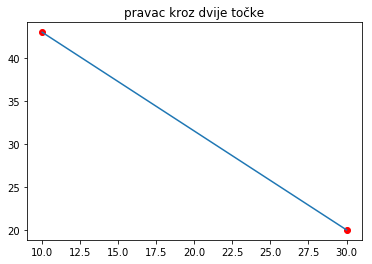

In [3]:
P= random_point()
Q= random_point()
P.connectpoints(Q)
plt.show()

**DEF:** Pravci su **kompunktalni** ako svi prolaze kroz istu točku.

Text(0.5,1,'Kompunktalni pravci')

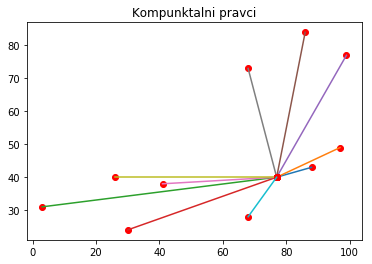

In [4]:
#Prikaz kompunktalnih pravaca kroz proizvoljnu točku K.
K=random_point()
O=Point(0,0)
L=[]
for i in range(10):
    L.append(random_point())
    K.connectpoints(L[i])
plt.title('Kompunktalni pravci')


**DEF:** **Zrcaljenje** s obzirom na pravac p je preslikavanje  $\zeta_p:E^2\to E^2$ zadano s $\zeta_px=x-2\langle x-P,n\rangle n$, gdje je pravac zadan točkom P i normalom n.

**1.Primjer:**
Neka je p pravac kroz točku P=(2,2) s normalom (1,1).Neka je Q=(3,3) neka točka. Određujemo simetričnu točku od Q s obzirom na pravac p.

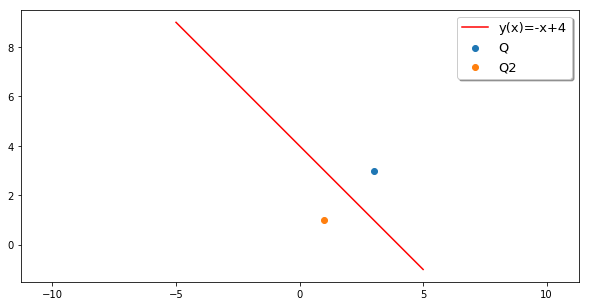

In [5]:
P = Point(2, 2)
Q = Point(3, 3)
n = Point(1, 1)
def line(a, b):
    def y(x):
        return a * x + b
    return y
def line1(P, n):
    return line(-n.x / n.y, P.y + n.x / n.y * P.x)
Q2=Q.mirror(P, n)
y=line1(P, n)
x=np.linspace(-5,5)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plt.plot(x, y(x), color='red', label='y(x)=-x+4' )
ax.scatter(Q.x, Q.y, label='Q')
ax.scatter(Q2.x, Q2.y, label='Q2')
ax.legend(loc='best', fontsize=13, shadow=True)
plt.axis('equal')
plt.show()


**2.Primjer:** Neka je K1 random točka.Neka je $y=2x+1$ pravac. Odredimo refletiranu točku od K1.

<function matplotlib.pyplot.show>

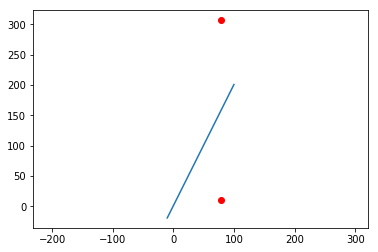

In [6]:
K1=random_point()
a = 2
b = 1
y1 = line(2, 1)
V = Point(K1.x, K1.y - b)
L = Point(1, a)
K2 = L * (2 * (V.x) / (L.x))- V
K1.plot_point()
x1 = np.linspace(-10,100)
plt.plot(x1, y1(x1))
plt.axis('equal')
K2.plot_point()
plt.show

**DEF:** **Izometrija** je preslikavanje koje čuva udaljenost $f:E^2\to E^2 $  t.d  $ d(f(x),f(y))=d(x,y)$.

Zrcaljenje je jedan primjer izometrije.Ako neko proizvoljno  preslikavanje $f:E^2\to E^2 $ napišemo u matričnom obliku t.d $f(x)=Ax+b$,onda je ono izometrija $\iff$ je A ortogonalna matrica.

In [7]:
def Ortogonalna(A):
    for i in range(len(A[0, :])):
        if np.linalg.norm(A[:, i]) != 1:
            return False
    return True
A=np.array([[0, 1], [-1, 0]])
Ortogonalna(A)

True

**DEF:** Neka je a pravac te p,q okomiti pravci. Kompozicija $\zeta_p\zeta_q$ je **TRANSLACIJA DUŽ  PRAVCA a**.
$\tau x=x+v $, za neki vektor v je translacija.<br>
$D:$<br>
$p=P+[n],q=Q+[n]$, gdje $[n]$ označava smjer pravca, a P i Q točke kroz kojim pravci prolaze.<br>
$\zeta_p\zeta_q x = \zeta_q x-2 {\langle \zeta_q x-P,n\rangle}n = x-2{\langle x-Q,n\rangle}n-2{\langle x-P,n\rangle}n+n{\langle x-Q,n\rangle}{\langle n,n\rangle}n = x-2{\langle x-Q,n\rangle}n-2{\langle x-P,n\rangle}n+n{\langle x-Q,n\rangle}n = x +2{\langle P-Q,n\rangle}n=x+2(P-Q){\langle 1,n\rangle}=x+2(P-Q)$<br>
<br>
Pokažimo da je takva translacija izometrija.


In [8]:
import sympy as sp
import IPython as ip
sp.init_printing()
x, y, v = sp.symbols('x y v')
norm1 = sp.symbols('||x-y||')
norm2 = sp.symbols('||f(x)-f(y)||')
udaljenost = sp.Symbol('d(x,y)')
def translacija (v):
    def f (x):
        return x + v
    return f
f = translacija(v)
solve = sp.cancel(f(x)- f(y))
sp.Eq(udaljenost, norm1), sp.Eq(norm2, norm1)
#sympy.Eq(x-y,f(x)-(y))
#sympy.init_printing(use_latex='mathjax')
#display(ip.display.Latex("||x-y||="))
#x-y
#display(ip.display.Latex("||f(x)-f(y)||=||(x+v)-(y+v)||"),sympy.cancel(f(x)-f(y)))

Jer je udaljenost d(x,y) definira preko norme razlike x-y,očito je translacija izometrija.<br>
Neka su p i q t.d $p|| q$.Neka je a pravac t.d $ a \bot p,q$. 
Neka su P i Q sjecišta redom pravca p sa a i q sa a. 
Gornji dokaz pokazuje da je kompozicija 2 zrcaljenja s obzirom na pravce p i q duž a: $\tau x=x+2(P-Q)$ <br>
<br>
**3.Primjer:** Prikažimo paralelne pravce $p=2x+1$,  $q=2x-1$, njima okomit pravac. Translatirajmo točku  $P=(0,1)$ duž a,u odnosu na p i q.

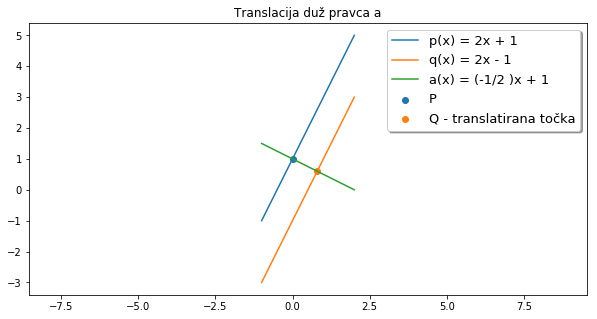

In [9]:
from fractions import Fraction as frac
x = np.linspace(-1,2)
p = line(2,1)
q = line(2,-1)
a = line(-1/2,1)
P = Point(0,1)
#Točka presjeka pravca q i pravca n : p(x)=n(x),iz čega slijedi x=4/5,tada je y=3/5
Q = Point(frac(4,5),frac(3,5))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.plot(x, p(x), label ='p(x) = 2x + 1')
plt.plot(x, q(x), label ='q(x) = 2x - 1')
plt.plot(x, a(x), label ='a(x) = (-1/2 )x + 1')
ax.scatter(P.x, P.y, label='P')
ax.scatter(Q.x, Q.y,label='Q - translatirana točka')
ax.legend(loc='best', fontsize=13, shadow=True)
plt.axis('equal')
plt.title('Translacija duž pravca a')
plt.show()


**PROP:** Translacija je bijekcija,ima inverz koji je također translacija. Vrijedi $\tau_\lambda \tau_\mu=\tau_{\lambda+\mu} $ za neke vektore $\lambda, \mu $.<br>
Putem sympy.Eq() lako mozemo provjeriti jesu li igrazi jednaki,koristimo gore definiranu funkciju.


In [10]:
x = sp.Symbol('x')
l = sp.Symbol(r"\lambda")
m = sp.Symbol(r"\mu")

tl = translacija(l)
tm = translacija(m)
tlm = translacija(l+m)
display(tlm(x))
display(tl(tm(x)))
sp.Eq(tlm(x), tl(tm(x)), evaluate=False)

**DEF:** Neka je $P \in E^2$ te $a,b \in P$ pravci kroz točku P. Preslikavanje $\zeta_a\zeta_b$ zovemo **ROTACIJA** oko točke P. Ako je a=b, onda je ta rotacija identiteta.<br>

In [11]:
def mirror(Q, n):
    def f(P):
        return P.mirror(Q, n)
    return f

def sym_S(phi):
    return sp.Matrix([[sp.cos(2*phi), sp.sin(2*phi)], [sp.sin(2*phi),- sp.cos(2*phi)]])
def sym_R(phi):
    return sp.Matrix([[sp.cos(phi), -sp.sin(phi)], [sp.sin(phi), sp.cos(phi)]])

display(sp.Eq(sp.Symbol(r"S_\alpha"),sym_S(sp.Symbol(r"\alpha")),evaluate=False))
display(sp.Eq(sp.Symbol(r"R_\beta"),sym_S(sp.Symbol(r"\beta")),evaluate=False))


           ⎡cos(2⋅\alpha)  sin(2⋅\alpha) ⎤
S_\alpha = ⎢                             ⎥
           ⎣sin(2⋅\alpha)  -cos(2⋅\alpha)⎦

          ⎡cos(2⋅\beta)  sin(2⋅\beta) ⎤
R_\beta = ⎢                           ⎥
          ⎣sin(2⋅\beta)  -cos(2⋅\beta)⎦

Prva prikazana matrica  $S_\alpha$ je matrica zrcaljenja za $\alpha$ s obzirom na pravac kroz ishodište.<br>
Druga prikazana matrica $R_\beta$ je matrica rotacije za kut $\beta$ oko ishodišta <br>

In [12]:
def S(phi):
    return np.array([[np.cos(2*phi),np.sin(2*phi)],[np.sin(2*phi),-np.cos(2*phi)]])
def R(phi):
    return np.array([[np.cos(phi),-np.sin(phi)],[np.sin(phi),np.cos(phi)]])

Prikazat cemo u *data frama-u* sve  kompozicije matrica oblika $S_\alpha$ i $R_\beta$.

In [13]:
from pandas import DataFrame as df
d = {"S(a)": ["S(a - c / 2)", "R(2(b - a))"],"R(d)":["R(c + d)","S(b - d/2)"]}
d1 = df(d,index=["R(c)","S(b)"])
d1

,R(d),S(a)
R(c),R(c + d),S(a - c / 2)
S(b),S(b - d/2),R(2(b - a))


- S($\alpha$) = $S_\alpha$
- R($\beta$) = $R_\beta$ 
gdje su $S_\alpha$,$R_\beta$ 

In [14]:
display(sp.expand(sym_S(sp.Symbol(r"\phi"))*sym_R(sp.Symbol(r"\alpha")),trig=True))
display(sp.expand(sym_S(sp.Symbol(r"\phi")-sp.Symbol(r"\alpha")/2), trig=True))

⎡                                                      2                      
⎢ 2⋅sin(\alpha)⋅sin(\phi)⋅cos(\phi) + 2⋅cos(\alpha)⋅cos (\phi) - cos(\alpha)  
⎢                                                                             
⎢                   2                                                         
⎣- 2⋅sin(\alpha)⋅cos (\phi) + sin(\alpha) + 2⋅sin(\phi)⋅cos(\alpha)⋅cos(\phi) 

                    2                                                        ⎤
 - 2⋅sin(\alpha)⋅cos (\phi) + sin(\alpha) + 2⋅sin(\phi)⋅cos(\alpha)⋅cos(\phi)⎥
                                                                             ⎥
                                                       2                     ⎥
 -2⋅sin(\alpha)⋅sin(\phi)⋅cos(\phi) - 2⋅cos(\alpha)⋅cos (\phi) + cos(\alpha) ⎦

⎡                                                      2                      
⎢ 2⋅sin(\alpha)⋅sin(\phi)⋅cos(\phi) + 2⋅cos(\alpha)⋅cos (\phi) - cos(\alpha)  
⎢                                                                             
⎢                   2                                                         
⎣- 2⋅sin(\alpha)⋅cos (\phi) + sin(\alpha) + 2⋅sin(\phi)⋅cos(\alpha)⋅cos(\phi) 

                    2                                                        ⎤
 - 2⋅sin(\alpha)⋅cos (\phi) + sin(\alpha) + 2⋅sin(\phi)⋅cos(\alpha)⋅cos(\phi)⎥
                                                                             ⎥
                                                       2                     ⎥
 -2⋅sin(\alpha)⋅sin(\phi)⋅cos(\phi) - 2⋅cos(\alpha)⋅cos (\phi) + cos(\alpha) ⎦

Prva matrica pokazuje $S_\phi R_\alpha.$ Druga prikazuje $S_{\phi- \alpha/2}.$ <br>
Vidimo da vrijedi: $S_\phi R_\alpha = S_{\phi- \alpha/2}$

**PROP:** (O 3 ROTACIJE) Neka su  a,b,c tri pravca kroz točku P. Tada postoji jedinstveni pravac d kroz P t.d $\zeta_a \zeta_b \zeta_c = \zeta_d.$ <br>
$D:$ <br>
Neka je p radijvektor točke P.<br>
$\zeta_a=\tau_p S_\theta \tau_{-p} $ <br>
$\zeta_b=\tau_p S_\phi \tau_{-p} $ <br>
$\zeta_c=\tau_p S_\psi \tau_{-p} $ <br>
Možemo odrediti d t.d $\zeta_d =\tau_p S_{\theta-\phi +\psi} \tau_{-p}$ tj. d je pravac s vektorom smjera $(\cos(\theta-\phi +\psi),\sin(\theta-\phi +\psi))$ kroz točku P. <br>
<br>
**6.Primjer:**
Neka su A,B,C,P random točke. Neka su a,b,c pravci određeni redom točkama A i P, B i P, C i P.<br>
Odredimo jedinstveni pravac d t.d vrijedi propozicija o 3 rotacije.

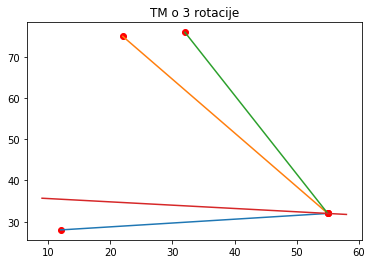

In [15]:
P = random_point()
A = random_point()
B = random_point()
C = random_point()
L1=(A, B, C)
for T in L1:
    P.connectpoints(T)
def tangens_zbroj(a, b):
    return (a + b) / (1 - a * b)
#koeficjenti smjerova
theta = (A.y- P.y) / (A.x - P.x)
phi = (B.y - P.y) / (B.x - P.x)
psi = (C.y - P.y) / (C.x - P.x)
delta = tangens_zbroj(tangens_zbroj(theta,-phi),psi)
x1 = np.linspace(min(P.x,A.x,B.x,C.x)-3,max(P.x,A.x,B.x,C.x)+3)
d = line(delta, P.y-delta*P.x)
plt.plot(x1, d(x1))
plt.title('TM o 3 rotacije')
plt.show()

## 2. AFINO PRESLIKAVANJE

**DEF:** $T:E^2 \to E^2$ afino preslikavanje $Tx=Ax+b, x \in E^2$ $x= \begin{pmatrix} x_1 \\ x_2\end{pmatrix}, b = \begin{pmatrix} b_1 \\ b_2\end{pmatrix}, A = \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}\end{pmatrix}.$ <br> Ako je T bijekcija, onda je inverz od T je afino preslikavanje. <br>
Slijedi prikaz nekih afinih preslikavanja,spomenutih i definiranih ranije.

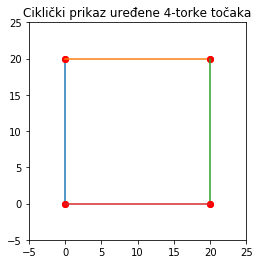

In [16]:
def afino(A,b):
    def f(P):
        return Point(A[0,0] * P.x+A[0,1] * P.y + b.x, A[1,0] * P.x + A[1,1] * P.y + b.y)
    return f

def poligon(l, ax=None, *args, **kwargs):
    if ax == None:
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
    ax.set_aspect('equal')
    for i in range(1, len(l)):
        l[i].connectpoints(l[i-1], *args, **kwargs)
    l[0].connectpoints(l[len(l)-1], *args, **kwargs)
l = [Point(0,0), Point(0,20), Point(20,20), Point(20,0)]

poligon(l)
plt.xlim(-5,25)
plt.ylim(-5,25)
plt.title('Ciklički prikaz uređene 4-torke točaka')
plt.show()


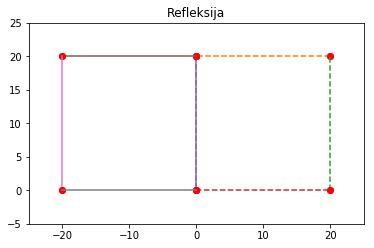

In [17]:
l1 = []
A1 = np.array([[-1,0], [0,1]])
b = Point(0,0)
refl = afino(A1,b)
for T in l:
    l1.append(refl(T))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
poligon(l,ax,'--')
poligon(l1,ax)
plt.xlim(-25,25)
plt.ylim(-5,25)
plt.title('Refleksija')
plt.show()


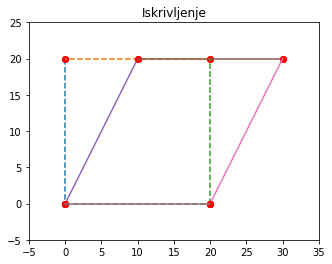

In [18]:
def Skewing(l):
    return np.array([[1,l], [0,1]])
A2 = np.asmatrix(Skewing(0.5))
skew = afino(A2,b)
l2 = []
for T in l:
    l2.append(skew(T))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
poligon(l, ax,'--')
poligon(l2, ax)
plt.xlim(-5, 35)
plt.ylim(-5, 25)
plt.title('Iskrivljenje')
plt.show()

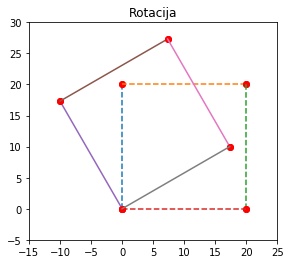

In [19]:
A3=np.asmatrix(R(np.pi/6))
rot=afino(A3, b)
l3=[]
for T in l:
    l3.append(rot(T))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
poligon(l, ax,'--')
poligon(l3, ax)
plt.xlim(-15, 25)
plt.ylim(-5, 30)
plt.title('Rotacija')
plt.show()


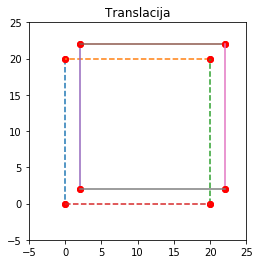

In [20]:
A4 = np.asmatrix([[1,0],[0,1]])
b = Point(2,2)
trans = afino(A4,b)
l4 = []
for T in l:
    l4.append(trans(T))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
poligon(l, ax,'--')
poligon(l4, ax)
plt.xlim(-5, 25)
plt.ylim(-5, 25)
plt.title('Translacija')
plt.show()


[[ 0.8660254 -0.0669873]
 [ 0.5        1.1160254]]


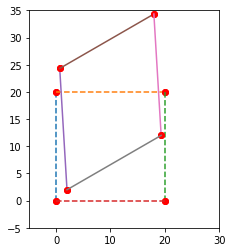

In [21]:
A5 = A4 * A3 * A2
print(A5)
b = Point(2,2)
komp = afino(A5,b)
l5 = []
for T in l:
    l5.append(komp(T))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
poligon(l,ax,'--')
poligon(l5,ax)
plt.xlim(-5, 30)
plt.ylim(-5, 35)
plt.title('')
plt.show()

## 3. SFERNA RAVNINA


Prelazimo na trodimenzionalni euklidski prostor na kojem je definirana **udaljenost** kao $d(A,B)=||B-A||$, **skalarni produkt** $\langle x,y \rangle = x_1y_1+x_2y_2+x_3y_3 $ $x,y \in \mathbb{R}^3 .$ <br>
$x\times y = (x_2y_3-y_2x_3,-x_1y_3+y_1x_3,x_1y_2-y_1x_2)$ je **vektorski produkt**.


**DEF:** Ravnina u $E^3$ je jednoznačno određena smjerom i točkom.<br>
Ravnina $\Pi$ je skup točaka iz  $E^3$ sa svojstima
1. $\Pi \neq p$, gdje je p pravac
2. $\forall A,B \in \Pi$,$ AB \subseteq \Pi $
3. $\Pi \neq E^3$<br>
Ravnina zadana eksplicitna jednadžbom $\Pi(x,y)=ax+by+cz+d$ ,$x,y \in \mathbb{R}$, $a,b,c \in \mathbb{R}^3$ nekolinearni vektori, d konstantni vektor u  $\mathbb{R}^3.$ <br>$(a,b,c)$ je vektor normale.

**PROP:** Neka P,Q,R nekolinearne točke, tada $\exists!$ ravnina koja ih sadrži.<br>
Za dokaz egzistencije uzmemo samo $v:=Q-P$, $w:=R-P$.<br>
Znamo da je  $P+[u,w]$ ravnina koja sadrži te točke.

**DEF:** **Jedinična sfera** u $E^3$ je skup $S^2={x \in E^3 : ||x||=1}.$<br>
Točke su elementi,a pravci su presjeci sfere s ravnina kroz ishodište.<br>
**DEF:** Neka je $e$ jedinični vektor, $e \in E^3$, $||e||$ = 1 . Skup $P={x \in S^2:{\langle e,x\rangle}=0 }$ zovemo pravcem s polom e.

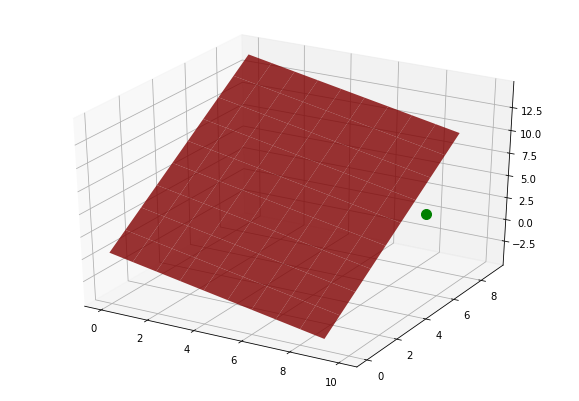

In [22]:
from mpl_toolkits.mplot3d import Axes3D
K1  = np.array([1, 2, 3])
N = np.array([1, -3, 2]) #Normala
point2 = np.array([10, 5, 5])

def prikaz_ravnine(x,n,plt3d=None, *args, **kwargs):
    #Odredimo d iz jednadžbe ravnine
    d = -x.dot(n)
    xx, yy = np.meshgrid(range(10), range(10))
    #Odredimo odgovarajući z
    z = (-n[0] * xx - n[1] * yy - d) * 1. /n[2]
    #prikaz
    if plt3d == None:
        plt3d = plt.figure(figsize=(10,7)).gca(projection='3d')
    plt3d.plot_surface(xx, yy, z, alpha=0.8, color='red')

prikaz_ravnine(K1,N)
#prikaz dodatne točke
ax = plt.gca()
ax.scatter(point2[0] , point2[1] , point2[2],  color='green',s=100)
plt.show()

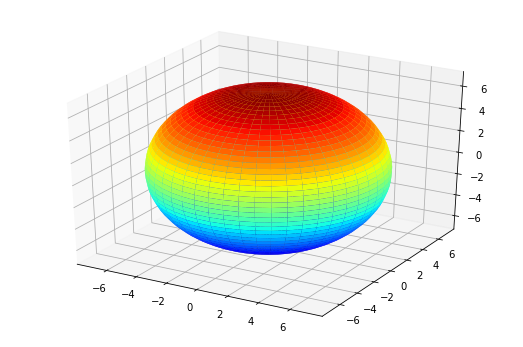

In [23]:
from matplotlib import cm
import imageio
def sfera(r=1):
    ph=np.linspace(0,2*np.pi)
    the=np.linspace(0,np.pi)
    x=np.array([r*np.cos(ph)*np.sin(the0) for the0 in the])
    y=np.array([r*np.sin(ph)*np.sin(the0) for the0 in the])
    z=np.array([[r*np.cos(the0) for i in range(len(ph))] for the0 in the])
    return x,y,z
s=sfera()
ax = Axes3D(fig)
plt3d = plt.figure(figsize=(9,6)).gca(projection='3d')
plt3d.plot_surface(*sfera(7),rstride=1, linewidths=5, cstride=1,cmap=cm.jet,shade=True)
plt.show()
images = []

#Prikazujemo pod drugim kutevima i spremamo slike
##for angle in range(70,210,2):
#    fig = plt.figure(figsize=(9,6))
#    ax = fig.gca(projection='3d')
#    ax.plot_surface(*s,linewidths=7, cmap=cm.jet,shade=True)
#
#    # Kut kamere
#    ax.view_init(30,angle)

#     Spremanje
#    filename='sfera'+str(angle)+'.png'
#    plt.savefig(filename, dpi=96)
#    plt.gca()
#    plt.close(fig)
#    images.append(imageio.imread(filename))

#imageio.mimsave('sfera.gif', images)

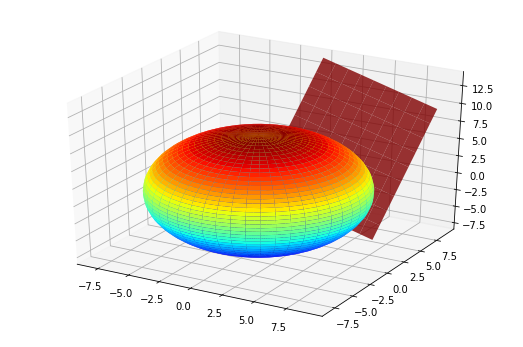

In [24]:
plt3d = plt.figure(figsize=(9,6)).gca(projection='3d')
plt3d.plot_surface(*sfera(8),rstride=1, linewidth=10,cstride=1,cmap=cm.jet,shade=True)
prikaz_ravnine(K1,N,plt3d)
plt.show()


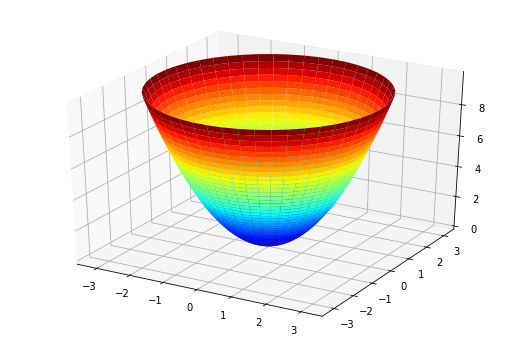

In [25]:
def hiper_vector(a,b,c):
    ph=np.linspace(0,2*np.pi)
    the=np.linspace(0,np.pi)
    x=np.array([a*np.cos(ph)*the0 for the0 in the])
    y=np.array([b*np.sin(ph)*the0 for the0 in the])
    z=(x**2 + y**2)*c
    return x,y,z
s=hiper_vector(1,1,1)
plt3d = plt.figure(figsize=(9,6)).gca(projection='3d')
plt3d.plot_surface(*s, linewidth=10,cmap=cm.jet,shade=True)
plt.show()

**5.Primjer:** Neka je ravnine određene točkom (1,2,2) i vektorom normale (1,2,3 ),a pravac točkama (1,3,4) i (2,2,2).Odredi kut između ravnine i pravca.

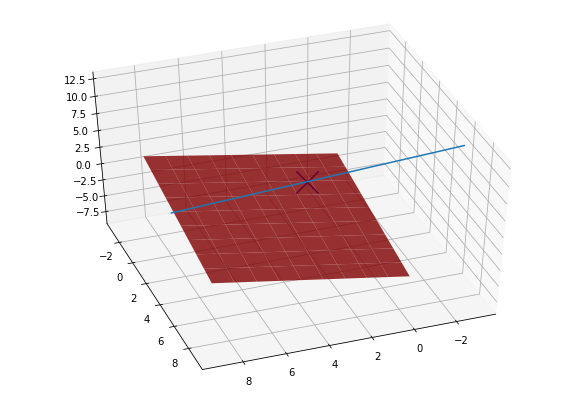

In [26]:
#x=np.linspace(-10,10)
n=np.array([1,-1,-2]) #Izračunato ispod
T0=np.array([2,2,2])
t=np.linspace(-5,5)
def pravac3d(n,T0):
    x=[T0[0] + ti * n[0] for ti in t]
    y=[T0[1] + ti * n[1] for ti in t]
    z=[T0[2] + ti * n[2] for ti in t]
    return x,y,z
ax = plt.figure(figsize=(10,7)).gca(projection='3d')
p3d = pravac3d(n,T0)
ax.plot(*p3d)
prikaz_ravnine(T0,n,ax)
ax.view_init(45,70)
#točka presjeka izračunata dolje
Presjek=[15/7,13/7,12/7]
ax.scatter(Presjek[0],Presjek[1],Presjek[2],s=500, c='b', marker='x',linewidths=40)
plt.show()


In [27]:
from sympy import Plane, Point3D, Line3D
from sympy.abc import x

pi_1 = Plane(Point3D(1, 2, 2), normal_vector=(1, 2, 3))
y_1 = Line3D(Point3D(1, 3, 4), Point3D(2, 2, 2))
pi_2 = Plane(Point3D(1, 5, 2), normal_vector=(1, 5, 3))

y_2 = Line3D(Point3D(0, 2, 3), Point3D(1, 1, 1))
pi_1.angle_between(y_1), y_1.direction_ratio,

In [28]:
#Određujemo udaljenost između gore definirane ravnine pi i pravca y te ravnine pi_1 i točke C=(1,2,3).
c = Point3D(1, 2, 3)
pi_1.distance(y_1), pi_1.distance(c)


In [29]:
#Određujemo presjek ravnine pi_1 i točke y_1 te ravnine pi_2 i pravca y_2.
pi_1.intersection(y_1), pi_2.intersection(y_1)

In [30]:
#Određujemo je jesu li ravnine pi_1 i pi_2 te pravci y_1 i y_2 paralalelni.
#Jesu li okomiti?
pi_1.is_parallel(pi_2), y_1.is_parallel(y_2), pi_1.is_perpendicular(pi_2)

(False, True, False)

**6.Primjer:** Neka je pi ravnina zadana kroz 3 točke. Odredi vektor normale te paralelnu ravninu.

In [31]:
pi = Plane(Point3D(2,3,6), Point3D(1,1,1), Point3D(1,2,1))


pi.normal_vector, pi.parallel_plane(Point3D(5,6,7))

In [32]:
import hyperbolic as hyper

from drawSvg import Path
import math
import random
import drawSvg as draw
from drawSvg import Drawing
from hyperbolic import euclid, util
from hyperbolic.poincare.shapes import *
from hyperbolic.poincare import Transform
l = hyper.euclid.shapes.Line(0,0,2,2)
p = l.makePerpendicular(2,0, length=math.sqrt(2))

print(p)
print(math.hypot(p.x2-p.x1, p.y2-p.y1))
print(math.atan2(p.y2-p.y1, p.x2-p.x1)*180/math.pi)

Line(1.0, 1.0, 0.0, 2.0)
1.414213562373095
135.0


C:\Users\Tatjana\drawSvg\raster.py:11: RuntimeWarning: CairoSVG will need to be install to rasterize images: Install with `pip3 install cairosvg`
  warnings.warn(msg, RuntimeWarning)


In [33]:
c1 = hyper.euclid.shapes.Circle(-1,0,2)
c2 = hyper.euclid.shapes.Circle(1,0,3)
hyper.euclid.shapes.Line.radicalAxis(c1,c2)

Line(-1.25, 0.0, -1.25, 1.0)

Single (0.29289321881345254, 0.29289321881345254)
1.6455619111856359 1.7637079407904235 0.04674578112205663 0.6978305207480378
-0.40000000000000036 0.3999999999999997


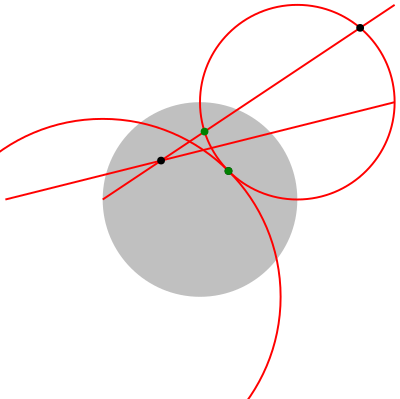

In [34]:
circ1 = hyper.euclid.shapes.Circle(-1,-1,math.sqrt(8)-1)
circ2 = hyper.euclid.shapes.Circle(1,1,1)
line1 = hyper.euclid.shapes.Line(2,2, -1,0)
line2 = hyper.euclid.shapes.Line(-2,0, 2,1)
#line1 = hyper.euclid.shapes.OriginLine(4,1)

try:
    x1, y1, x2, y2 = hyper.euclid.intersection.circleCircle(circ1, circ2)
    print(x1, y1, x2, y2)
except hyper.euclid.SingleIntersection as e:
    print('Single', e)
    x1, y1 = e.args
    x2, y2 = x1, y1
except hyper.euclid.NoIntersection:
    print('No intersection')
    x1, y1, x2, y2 = (float('nan'),)*4
except hyper.euclid.InfiniteIntersections as e:
    print('Infinite')
    x1, y1, x2, y2 = (float('nan'),)*4

try:
    x1b, y1b, x2b, y2b = hyper.euclid.intersection.circleLine(circ2, line1)
    print(x1b, y1b, x2b, y2b)
except hyper.euclid.SingleIntersection as e:
    print('Single', e)
    x1b, y1b = e.args
    x2b, y2b = x1, y1
except hyper.euclid.NoIntersection:
    print('No intersection')
    x1b, y1b, x2b, y2b = (float('nan'),)*4

try:
    x1c, y1c = hyper.euclid.intersection.lineLine(line1, line2)
    print(x1c, y1c)
except hyper.euclid.NoIntersection:
    print('No intersection')
    x1c, y1c = (float('nan'),)*2
except hyper.euclid.InfiniteIntersections as e:
    print('Infinite')
    x1c, y1c = (float('nan'),)*2

d = Drawing(4.1, 4.1, origin='center')
d.draw(hyper.euclid.shapes.Circle(0, 0, 1), fill='silver')
d.draw(circ1, stroke='red', stroke_width=0.02, fill='none')
d.draw(circ2, stroke='red', stroke_width=0.02, fill='none')
d.draw(line1, stroke='red', stroke_width=0.02, fill='none')
d.draw(line2, stroke='red', stroke_width=0.02, fill='none')
d.draw(hyper.euclid.shapes.Circle(x1, y1, 0.04), fill='black')
d.draw(hyper.euclid.shapes.Circle(x2, y2, 0.04), fill='green')
d.draw(hyper.euclid.shapes.Circle(x1b, y1b, 0.04), fill='black')
d.draw(hyper.euclid.shapes.Circle(x2b, y2b, 0.04), fill='green')
d.draw(hyper.euclid.shapes.Circle(x1c, y1c, 0.04), fill='black')

d.setRenderSize(w=400)
d.saveSvg('Desktop/euclidTest.svg')
d

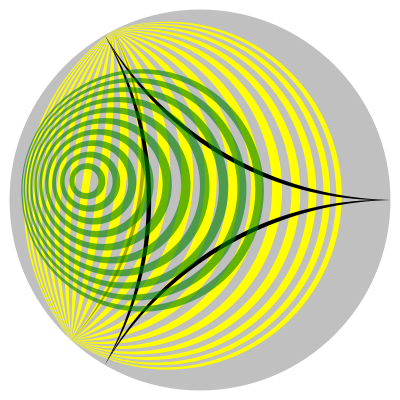

In [35]:
p1 = Point(0,-.5)
p2 = Point(.5, .5)
hl = Line.fromPoints(*p1, *p2, segment=False)
hl2 = Line.fromPoints(-.5,-.5,-.3,.3, segment=False)
hcList = [Hypercycle.fromHypercycleOffset(hl2, i/4) for i in range(-10,11) if i!=None] 


p = Point(-.6, .1)

hlp1 = Line.fromPoints(*Ideal.fromDegree(0), *Ideal.fromDegree(360/3))
hlp2 = Line.fromPoints(*Ideal.fromDegree(360/3), *Ideal.fromDegree(360/3*2))
hlp3 = Line.fromPoints(*Ideal.fromDegree(360/3*2), *Ideal.fromDegree(0))

circList = [Circle.fromCenterRadius(p, 0.1*(i*2+2.5)) for i in range(10)]

d = Drawing(2.1, 2.1, origin='center')
d.draw(euclid.shapes.Circle(0, 0, 1), fill='silver')
for hc in hcList:
    d.draw(hc, hwidth=1/8, fill='yellow')
d.draw(hl2, hwidth=1/8/3, fill='#aaaa00')

lineStyle = dict(hwidth=0.05, fill='black')
d.draw(hlp1, **lineStyle)
d.draw(hlp2, **lineStyle)
d.draw(hlp3, **lineStyle)
for circ in circList:
    d.draw(circ, hwidth=0.1, fill='green', opacity=0.6)
d.setRenderSize(w=400)
d